<font size="+5">#08. Cluster Analysis con k-Means</font>

# Cargar Datos

> - Simplemente, copiamos y pegamos las siguientes líneas de código para cargar los datos.
> - La tabla contiene **estadísticas sobre Coches** (columnas).
> - Para distintas **Marcas/Modelos de coche** (filas).

```python
import seaborn as sns

df = sns.load_dataset(name='mpg', index_col='name')
df.sample(10)
```

In [34]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset(name='mpg', index_col='name')
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
plymouth valiant,18.0,6,225.0,105.0,3121,16.5,73,usa
peugeot 505s turbo diesel,28.1,4,141.0,80.0,3230,20.4,81,europe
pontiac phoenix lj,19.2,6,231.0,105.0,3535,19.2,78,usa
chevrolet nova custom,16.0,6,250.0,100.0,3278,18.0,73,usa
peugeot 504,23.0,4,120.0,88.0,2957,17.0,75,europe
dodge dart custom,15.0,8,318.0,150.0,3399,11.0,73,usa
dodge colt,26.0,4,98.0,79.0,2255,17.7,76,usa
mazda rx-7 gs,23.7,3,70.0,100.0,2420,12.5,80,japan
toyota starlet,39.1,4,79.0,58.0,1755,16.9,81,japan


# Seleccionar 2 Variables para el Análisis de Clúster

> En este caso **ambas variables son explicativas**. La variable que queremos predecir no se la damos al modelo. Sino que tratará de adivinarla en base a cómo de cerca estén los puntos.

In [57]:
explanatory = df[['cylinders','weight']]

In [58]:
explanatory.head()

,cylinders,weight
name,,
chevrolet chevelle malibu,8,3504
buick skylark 320,8,3693
plymouth satellite,8,3436
amc rebel sst,8,3433
ford torino,8,3449


# Scatterplot con las Variables

> Deberíamos observar en la gráfica cuántos posibles grupos podríamos hacer para agrupar los puntos.

<AxesSubplot:xlabel='cylinders', ylabel='weight'>

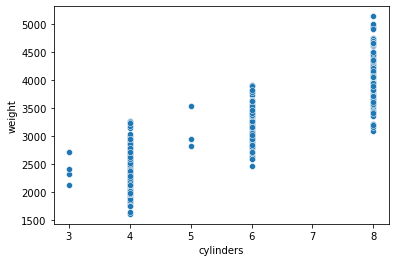

In [59]:
sns.scatterplot(data = df ,x = 'cylinders', y = 'weight')

# Transformación de los Datos

> Deberíamos valorar si tenemos que realizar algunos cambios a los datos para que el modelo de k-Means se compute adecuadamente y pueda comparar ambas variables.
>
> Las variables originales pueden tener un rango de valores diferente.
>
> Imaginemos que tenemos dos variables:
>
> - Peso (en kilogramos)
> - Altura (en metros)
>
> **Es lo mismo** incrementar 1 kilogramo de peso, que incrementar 1 metro de altura?
> 
> - Hazte las mismas preguntas con tus variables.

In [64]:
from sklearn.preprocessing import MinMaxScaler


In [65]:
scaler = MinMaxScaler()

In [66]:
transform_scaler = scaler.fit_transform(X=explanatory)
transform_scaler

array([[1.        , 0.5361497 ],
       [1.        , 0.58973632],
       [1.        , 0.51686986],
       [1.        , 0.51601928],
       [1.        , 0.52055571],
       [1.        , 0.77346187],
       [1.        , 0.77714772],
       [1.        , 0.76523958],
       [1.        , 0.79727814],
       [1.        , 0.63425007],
       [1.        , 0.5528778 ],
       [1.        , 0.56592005],
       [1.        , 0.60901616],
       [1.        , 0.41763538],
       [0.2       , 0.21519705],
       [0.6       , 0.34590303],
       [0.6       , 0.32917494],
       [0.6       , 0.27615537],
       [0.2       , 0.1465835 ],
       [0.2       , 0.06294301],
       [0.2       , 0.30025517],
       [0.2       , 0.23164162],
       [0.2       , 0.21604763],
       [0.2       , 0.17607031],
       [0.6       , 0.29345052],
       [1.        , 0.85114828],
       [1.        , 0.78338531],
       [1.        , 0.78508648],
       [1.        , 0.88432095],
       [0.2       , 0.1465835 ],
       [0.

In [67]:
df_scaled = pd.DataFrame(transform_scaler, columns=explanatory.columns)
df_scaled

,cylinders,weight
0,1.0,0.536150
1,1.0,0.589736
2,1.0,0.516870
3,1.0,0.516019
4,1.0,0.520556
...,...,...
393,0.2,0.333711
394,0.2,0.146583
395,0.2,0.193365
396,0.2,0.286929


# Entrenar Modelo `KMeans()`

> Podremos predecir 1, 2, 3,..., k grupos. Tantos como queramos. Sin embargo, seleccionaremos `n_cluster = 3` para no complicarnos la vida.
> 1. **Necesidad:** Entrenar Modelo
> 2. **Solución: Función** `fit()`

In [68]:
from sklearn.cluster import KMeans

In [69]:
model = KMeans(n_clusters=3, verbose=1)

In [70]:
model.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 1}

In [71]:
model.fit(X=explanatory)

Initialization complete
Iteration 0, inertia 42732548.0
Iteration 1, inertia 36012487.04540475
Iteration 2, inertia 34176445.19595156
Iteration 3, inertia 33813088.12803913
Iteration 4, inertia 33625672.77626843
Iteration 5, inertia 33552629.887148898
Iteration 6, inertia 33508207.878222417
Iteration 7, inertia 33450489.87851169
Iteration 8, inertia 33401536.065699093
Iteration 9, inertia 33355922.25302927
Converged at iteration 9: center shift 18.563629869238085 within tolerance 35.76710074429941.
Initialization complete
Iteration 0, inertia 43589433.0
Iteration 1, inertia 33628420.84514271
Iteration 2, inertia 33166533.31479215
Iteration 3, inertia 33123862.65587824
Iteration 4, inertia 33118254.162970953
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 46173172.0
Iteration 1, inertia 35828167.043416515
Iteration 2, inertia 34052731.45369302
Iteration 3, inertia 33756013.81113995
Iteration 4, inertia 33606160.93131662
Iteration 5, inertia 335

KMeans(n_clusters=3, verbose=1)

# Realizar Predicciones

> - `model.predict()`

Creo un modelo para introducir el número de cluster cómo una nueva columna

In [76]:
df1 = df[['cylinders', 'weight']]

In [77]:
df1['Cluster'] = model.predict(X=explanatory)

<ipython-input-77-dc100d071e1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Cluster'] = model.predict(X=explanatory)


In [78]:
df1

,cylinders,weight,Cluster
name,,,
chevrolet chevelle malibu,8,3504,2
buick skylark 320,8,3693,2
plymouth satellite,8,3436,2
amc rebel sst,8,3433,2
ford torino,8,3449,2
...,...,...,...
ford mustang gl,4,2790,2
vw pickup,4,2130,0
dodge rampage,4,2295,0


# Visualizar Modelo

> - Scatterplot con puntos coloreados según el grupo al que pertenece cada observación: `hue = model.labels_`
> - Añade otra capa de puntos, los cuales indicarán los centroides (se encuentran en `model.cluster_centers_`)

In [79]:
import matplotlib.pyplot as px

<AxesSubplot:xlabel='cylinders', ylabel='weight'>

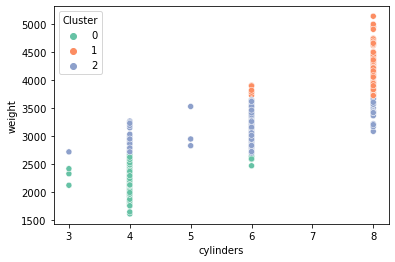

In [81]:
sns.scatterplot(x='cylinders', y='weight', hue= 'Cluster', data=df1, palette='Set2')

# Interpretar Modelo

> 1. Si tuvieras que ponerle nombre a cada grupo, ¿cuál le darías?
> 2. ¿En qué te basas para ello?

# Objetivos Alcanzados

_Haz doble click sobre esta celda y pon una `X` dentro de las casillas [X] si crees que has superado los objetivos:_

- [ ] Entender **cómo la máquina optimiza un modelo**, que no es más que encontrar **los números** una ecuación matemática.
- [ ] La importancia de la **Suma de Cuadrados** como concepto fundamental de la estadística para medir el **error**.
- [ ] Entender la necesidad de **Normalizar** los datos al emplear un algoritmo que involucra el **cálculo de distancias**.
- [ ] Entender que la estadística no es más que una forma de aproximarse a la realidad. Y esta aproximación no es una ciencia exacta, sino **subjetiva**.
- [ ] Empezar a distinguir, más aún, que la programación es una herramienta hacia un fin.
- [ ] Al principio, nos salen muchos errores programando y creemos que no valemos para esto. Sin embargo, en este momento del programa, veremos que existen unos **patrones que siempre se cumplen en los errores** y empezaremos a **entender la máquina**.
- [ ] Una vez más, nos daremos cuenta de que existen **distintos modelos para realizar el Análisis de Cluster**. De la misma manera que en el anterior capítulo también existían diversos Modelos de Regresión.